# Mini projet :  Méthode de gradient à pas spectral


Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.





On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

In [45]:
#importer les packages nécessaires pour ce TP
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

## Etape 1.

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas constant) :

$$
u^{(0)} \text { donné;} \quad  u^{(k+1)}=u^{(k)}-\rho_{k} \nabla J\left(u^{(k)}\right)
$$

> Modifier cet algorithme de sorte à ce que le pas $\rho_{k}$ soit donné par l'une des deux variantes, dites de **Barzilaï et Borwein** :

$$
\rho_{k}^{1}=\frac{\left(s^{(k-1)}, s^{(k-1)}\right)}{\left(y^{(k-1)}, s^{(k-1)}\right)} ; \quad \rho_{k}^{2}=\frac{\left(s^{(k-1)}, y^{(k-1)}\right)}{\left(y^{(k-1)}, y^{(k-1)}\right)}
$$

Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul de $u^{(1)}$ avec un pas initial $\rho_{0}$ décidé par l'utilisateur.

In [46]:
#Méthode de gradient à pas fixe:
def GF(fun, u, eta, EpsG, MaxIters):
    cost_history = np.zeros(MaxIters) 
     
    for k in range(MaxIters):
        [J,G] = fun(u)
        cost_history[k] = J 

        if np.linalg.norm(G) < EpsG:
          break

        u = u - eta * G 
         
    return u, k, cost_history

#Méthode de gradient à pas optimale:
def GO(fun, u, eta, EpsX, EpsG, MaxIters):

    cost_history = np.zeros(MaxIters)
    
    for k in range(MaxIters):
        [J, G] = fun(u)
        cost_history[k] = J 
        if np.linalg.norm(G) < EpsG or eta < EpsX:
          break
 
        etas = eta
        us = u - etas * G 
        [Js, Gs] = fun(us) 
        Jk = J
        Gk = -np.dot(G,G)   
        eta = -(Gk*etas*etas)/(2*(Js-Jk-Gk*etas))
        u = u - eta * G 
         
    return u, k, cost_history

In [47]:
def BB1(fun,u,eta,epsg,maxiter):#eta== pas initial de cet algorithme
  cost_history=np.zeros(maxiter)
  gradient=list()
  U=[u]
  for i in range(maxiter):
    J,G=fun(u)
    cost_history[i]=J
    gradient.append(G)
    if np.linalg.norm(G)<epsg:#condition d'arret
      break
    if i==0:
      u=u-eta*G  #précalcul de u1 avec le pas initial
    else:
      s=U[i]-U[i-1]
      y=gradient[i]-gradient[i-1]
      eta=np.dot(s,s)/np.dot(y,s)
      u=u-eta*G
    U.append(u)

  return u,i,cost_history,gradient[i]

def BB2(fun,u,eta,epsg,maxiter):
  cost_history=np.zeros(maxiter)
  gradient=list()
  U=[u]
  for i in range(maxiter):
    J,G=fun(u)
    cost_history[i]=J
    gradient.append(G)
    if np.linalg.norm(G)<epsg:#condition d'arret
      break
    if i==0:
      u=u-eta*G  #précalcul de u1 avec le pas initial
    else:
      s=U[i]-U[i-1]
      y=gradient[i]-gradient[i-1]
      eta=np.dot(s,y)/np.dot(y,y)
      u=u-eta*G
    U.append(u)

  return u,i,cost_history,gradient[i]

## Etape 2.

> Effectuer les tests de validation pour les fonctions quadratiques suivantes $(N=10)$ :

$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}
$$

In [48]:
def J1(v):
    N = len(v)
    e = np.ones(N)
    return [np.dot(v-e,v-e), 2*(v-e)]

def J2(v):
    N = len(v)
    i = np.arange(1, N+1)
    return [np.dot(v-i,v-i), 2*(v-i)]

N=2
u=np.zeros(N)
eta=0.5
epsg=1.e-08
maxiter=1500

#test de validation d'algorithm BB1
uBB1,nbreiter,cost_BB1,grad=BB1(J1,u,eta,epsg,maxiter)
print("le nbre d iteration  du BB1 est : {}".format(nbreiter))
print("le minimum est {} et son dérivé est {}".format(uBB1,grad))

#test de validation d'algorithm BB2
uBB2,nbreiter,cost_BB2,grad=BB2(J1,u,eta,epsg,maxiter)
print("le nbre d iteration du BB2 est : {}".format(nbreiter))
print("le minimum est {} et son dérivé est {}".format(uBB2,grad))

le nbre d iteration  du BB1 est : 1
le minimum est [1. 1.] et son dérivé est [0. 0.]
le nbre d iteration du BB2 est : 1
le minimum est [1. 1.] et son dérivé est [0. 0.]


## Etape 3.

On considère les fonctions suivantes (en dimension $N$ ) :

$$
J_{5}(v)=\frac{1}{2}(A v, v)-(f, v)+\sum_{i=1}^{i=N}\left(v_{i}\right)^{2}, \quad J_{6}(v)=\frac{1}{2}(A v, v)-(f, v)+\sum_{i=1}^{i=N}\left(v_{i}\right)^{4}
$$

avec $f=(1, \ldots, 1)$ et la matrice $A=\operatorname{tridiag}[-1,2,-1]$ et la fonction de Rosenbrock

$$
J_{R}(v)=\sum_{i=1}^{N-1}\left(v_{i+1}-v_{i}^{2}\right)^{2}+\sum_{i=1}^{N-1}\left(v_{i}-1\right)^{2}
$$

> Minimiser les fonctions $J_{5},$ $J_{6}$ et $J_{R}$ par BB1 et par BB2 $(N=10,20,40,80)$, et comparer les performances de ces deux variantes. On tracera sur un même graphique les courbes BB1 et BB2 de $J\left(u^{(k)}\right)$ en fonction des itérations $k$.

In [49]:
#construction de la matrice tridiagonale:
def tridiag(T,x,y,z,k1=-1, k2=0, k3=1):
    a = [x]*(T-abs(k1)); b = [y]*(T-abs(k2)); c = [z]*(T-abs(k3))
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)


$$
J_{5}(v)=\frac{1}{2}(A v, v)-(f, v)+\sum_{i=1}^{i=N}\left(v_{i}\right)^{2}, \
$$

In [50]:
def J5(v):
  N=len(v)
  A=tridiag(N,-1,2,-1)
  f=np.ones(N)
  return [1/2*(np.dot(A@v,v))-np.dot(f,v)+np.dot(v,v),(A@v)-f+2*v]

In [ ]:
N1=10
N2=20
N3=40
N4=80
u1=np.zeros(N1)
u2=np.zeros(N2)
u3=np.zeros(N3)
u4=np.zeros(N4)

eta=0.5
epsg=1.e-08
maxiter=1500
#Validation de l'algorithme BB1 :
uBB1,nbreiter1,cost_BB1,grad1=BB1(J5,u1,eta,epsg,maxiter)
uBB2,nbreiter2,cost_BB2,grad2=BB1(J5,u2,eta,epsg,maxiter)
uBB3,nbreiter3,cost_BB3,grad3=BB1(J5,u3,eta,epsg,maxiter)
uBB4,nbreiter4,cost_BB4,grad4=BB1(J5,u4,eta,epsg,maxiter)
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N1,nbreiter1))
print("la dérivée du minimum est {}".format(grad1))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N2,nbreiter2))
print("la dérivé du minimum est {}".format(grad2))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N3,nbreiter3))
print("la dérivée du minimum est {}".format(grad3))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N4,nbreiter4))
print("la dérivée du minimum  est {}".format(grad4))
print("");print("")
#validation de l'algorithme BB2:
uBB11,nbreiter11,cost_BB11,grad11=BB2(J5,u1,eta,epsg,maxiter)
uBB22,nbreiter22,cost_BB22,grad22=BB2(J5,u2,eta,epsg,maxiter)
uBB33,nbreiter33,cost_BB33,grad33=BB2(J5,u3,eta,epsg,maxiter)
uBB44,nbreiter44,cost_BB44,grad44=BB2(J5,u4,eta,epsg,maxiter)
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N1,nbreiter11))
print("la dérivée du minimum est {}".format(grad11))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N2,nbreiter22))
print("la dérivée du munimum est {}".format(grad22))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N3,nbreiter33))
print("la dérivée du minimum est {}".format(grad33))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N4,nbreiter44))
print("la dérivée du minimum est {}".format(grad44))

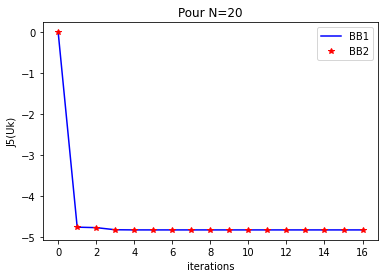

In [52]:
plt.plot(range(0,nbreiter2+1), cost_BB2[0:nbreiter2+1], 'b-', label="BB1")
plt.plot(range(0,nbreiter22+1), cost_BB22[0:nbreiter22+1], 'r*', label="BB2")
plt.xlabel('iterations')
plt.ylabel('J5(Uk)')
plt.title('Pour N=20')
plt.legend()
plt.show()

*->Selon le graphe, on remarque que les deux algorithmes BB1 et BB2 minimisent la fonction J5 en 16 itérations.*

$$J_{6}(v)=\frac{1}{2}(A v, v)-(f, v)+\sum_{i=1}^{i=N}\left(v_{i}\right)^{4}
$$

In [53]:
def J6(v):
  N=len(v)
  A=tridiag(N,-1,2,-1)
  f=np.ones(N)
  s=0
  for i in range(N):
    s+=(v[i]**4)
  return [1/2*(np.dot(A@v,v))-np.dot(f,v)+s,(A@v)-f+4*np.dot(v,v)*v]


In [ ]:
N1=10
N2=20
N3=40
N4=80
u1=np.zeros(N1)
u2=np.zeros(N2)
u3=np.zeros(N3)
u4=np.zeros(N4)

eta=0.5
epsg=1.e-08
maxiter=1500

#Validation de l'algorithme BB1 :
uBB1,nbreiter1,cost_BB1,grad1=BB1(J6,u1,eta,epsg,maxiter)
uBB2,nbreiter2,cost_BB2,grad2=BB1(J6,u2,eta,epsg,maxiter)
uBB3,nbreiter3,cost_BB3,grad3=BB1(J6,u3,eta,epsg,maxiter)
uBB4,nbreiter4,cost_BB4,grad4=BB1(J6,u4,eta,epsg,maxiter)
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N1,nbreiter1))
print("la dérivée du minimum est {}".format(grad1))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N2,nbreiter2))
print("la dérivé du minimum est {}".format(grad2))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N3,nbreiter3))
print("la dérivée du minimum est {}".format(grad3))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N4,nbreiter4))
print("la dérivée du minimum  est {}".format(grad4))
print("");print("")

#validation de l'algorithme BB2:
uBB11,nbreiter11,cost_BB11,grad11=BB2(J6,u1,eta,epsg,maxiter)
uBB22,nbreiter22,cost_BB22,grad22=BB2(J6,u2,eta,epsg,maxiter)
uBB33,nbreiter33,cost_BB33,grad33=BB2(J6,u3,eta,epsg,maxiter)
uBB44,nbreiter44,cost_BB44,grad44=BB2(J6,u4,eta,epsg,maxiter)
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N1,nbreiter11))
print("la dérivée du minimum est {}".format(grad11))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N2,nbreiter22))
print("la dérivée du munimum est {}".format(grad22))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N3,nbreiter33))
print("la dérivée du minimum est {}".format(grad33))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N4,nbreiter44))
print("la dérivée du minimum est {}".format(grad44))

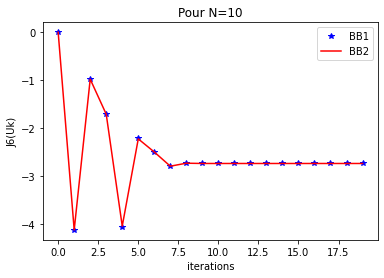

In [55]:
plt.plot(range(0,nbreiter1+1), cost_BB1[0:nbreiter1+1], 'b*', label="BB1")
plt.plot(range(0,nbreiter11+1), cost_BB11[0:nbreiter11+1], 'r', label="BB2")
plt.xlabel('iterations')
plt.ylabel('J6(Uk)')
plt.title('Pour N=10')
plt.legend()
plt.show()

$$
J_{R}(v)=\sum_{i=1}^{N-1}\left(v_{i+1}-v_{i}^{2}\right)^{2}+\sum_{i=1}^{N-1}\left(v_{i}-1\right)^{2}
$$

In [56]:
def JR(v):
    N = len(v)
    w1, w2, e = v[:-1], v[1:], np.ones(N-1)    
    dw1 = w2 - w1*w1
    dw2 = w1 - e
    diff1 = np.zeros(N)
    diff1[1: ]  = 2*dw1
    diff1[:-1] -= 4*w1*dw1
    diff2 = np.zeros(N)  
    diff2[:-1] = 2*dw2 
    return np.dot(dw1,dw1)+np.dot(dw2,dw2), diff1+diff2

In [57]:
N1=10
N2=20
N3=40
N4=80
u1=np.zeros(N1)
u2=np.zeros(N2)
u3=np.zeros(N3)
u4=np.zeros(N4)

eta=0.5
epsg=1.e-08
maxiter=1500

#Validation de l'algorithme BB1 :
uBB1,nbreiter1,cost_BB1,grad1=BB1(JR,u1,eta,epsg,maxiter)
uBB2,nbreiter2,cost_BB2,grad2=BB1(JR,u2,eta,epsg,maxiter)
uBB3,nbreiter3,cost_BB3,grad3=BB1(JR,u3,eta,epsg,maxiter)
uBB4,nbreiter4,cost_BB4,grad4=BB1(JR,u4,eta,epsg,maxiter)
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N1,nbreiter1))
print("la dérivée du minimum est {}".format(grad1))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N2,nbreiter2))
print("la dérivé du minimum est {}".format(grad2))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N3,nbreiter3))
print("la dérivée du minimum est {}".format(grad3))
print("")
print("le nbre d iteration  du BB1  pour N= {} est : {}".format(N4,nbreiter4))
print("la dérivée du minimum  est {}".format(grad4))
print("");print("")

#validation de l'algorithme BB2:
uBB11,nbreiter11,cost_BB11,grad11=BB2(JR,u1,eta,epsg,maxiter)
uBB22,nbreiter22,cost_BB22,grad22=BB2(JR,u2,eta,epsg,maxiter)
uBB33,nbreiter33,cost_BB33,grad33=BB2(JR,u3,eta,epsg,maxiter)
uBB44,nbreiter44,cost_BB44,grad44=BB2(JR,u4,eta,epsg,maxiter)
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N1,nbreiter11))
print("la dérivée du minimum est {}".format(grad11))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N2,nbreiter22))
print("la dérivée du munimum est {}".format(grad22))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N3,nbreiter33))
print("la dérivée du minimum est {}".format(grad33))
print("")
print("le nbre d iteration  du BB2  pour N= {} est : {}".format(N4,nbreiter44))
print("la dérivée du minimum est {}".format(grad44))

le nbre d iteration  du BB1  pour N= 10 est : 91
la dérivée du minimum est [-1.25766730e-10 -1.78290716e-10 -1.59442681e-10 -1.17921228e-10
 -1.40935708e-10 -1.78697057e-10 -1.73680625e-10 -1.70998327e-10
 -2.30768294e-10 -4.53002968e-10]

le nbre d iteration  du BB1  pour N= 20 est : 74
la dérivé du minimum est [-3.96548128e-10 -1.41152379e-09 -1.05259712e-09 -1.33539935e-09
 -1.44917323e-09 -2.38812925e-09 -1.40125333e-09 -2.69598788e-09
 -1.94551131e-09 -2.34809505e-09 -1.44576306e-09 -2.70052025e-09
 -1.45988377e-09 -1.86465288e-09 -9.92967930e-10 -1.33643274e-09
 -6.52143229e-10 -1.41667567e-09 -1.86549890e-09 -3.76515441e-09]

le nbre d iteration  du BB1  pour N= 40 est : 69
la dérivée du minimum est [-8.44779802e-11 -1.15760734e-10 -7.24642568e-11 -8.41531289e-11
  2.54383181e-11  2.47188936e-11  1.70462755e-10  1.47513113e-10
  2.94453351e-10  1.64433800e-10  2.06436646e-10 -3.31645822e-12
 -2.34434694e-12 -2.27357244e-10 -1.36051614e-10 -2.88313817e-10
 -1.39146916e-10 -1.5823

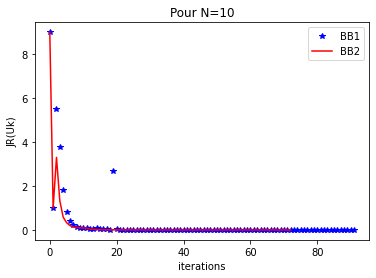

In [58]:
plt.plot(range(0,nbreiter1+1), cost_BB1[0:nbreiter1+1], 'b*', label="BB1")
plt.plot(range(0,nbreiter11+1), cost_BB11[0:nbreiter11+1], 'r', label="BB2")
plt.xlabel('iterations')
plt.ylabel('JR(Uk)')
plt.title('Pour N=10')
plt.legend()
plt.show()

## Etape 4.

Comparer sur les fonctions $J_{H}$ du TP1 et $J_{R}$ les performances relatives des méthodes BB1 (ou BB2) et des algorithmes NLCG (au choix Fletcher-Reeves, Polak-Ribiere ou Dai-Yuan) développés en TP2.

$$J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$$

In [59]:
def JH(x):
   var1 = x[0]**2 + x[1] - 2
   var2 = x[1]**2 - 2*x[0] + 1
   J = (var1)**2 + (var2)**2 
   G = np.array([4*x[0]*var1 - 4*var2, 2*var1 - 4*x[1]*var2])
   return J, G

In [60]:
def NLGC(fun, u, alpha, eta, MaxIters):
    # fun      : fonction objectif
    # u        : point initial
    # alpha    : pas fixe
    # eta      : tolérance
    # MaxIters : nombre maximal d'iterations

    cost_history = np.zeros(MaxIters) 
     
    [J, G] = fun(u) 
    cost_history[0] = J 
    d = -G 

    for k in np.arange(1,MaxIters):
             
        u = u + alpha * d
        Gtemp = G
        [J, G] = fun(u)
        cost_history[k] = J 

        betaFR = np.dot(G,G)/np.dot(Gtemp,Gtemp)        # Variante Fletcher-Reeves
        #betaPR = np.dot(G,G-Gtemp)/np.dot(Gtemp,Gtemp) # variante Polak-Ribiere
        #betaPR = max(0, betaPR)
        #betaDY = np.dot(G,G)/np.dot(G-Gtemp,d)         # variante Dai-Yuan

        d = -G + betaFR * d 

        if np.linalg.norm(G) < eta:
           break

    return u, k, cost_history

*Test de validation BB1,NLGC sur la fonction JR*

nbre d itération pour BB1 : 81
nombre d iteration pour NLGC : 86


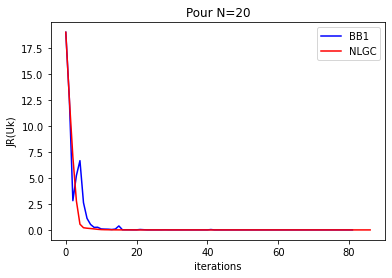

In [62]:
N=20
u=np.zeros(N)
eta=0.1
epsg=1.e-08
maxiter=1500
uBB1,nbreiter1,cost_BB1,grad1=BB1(JR,u,eta,epsg,maxiter)
uNLGC,nbreiterNLGC,cost_NLGC=NLGC(JR,u,eta,epsg,maxiter)
print("nbre d itération pour BB1 : {}".format(nbreiter1))
print("nombre d iteration pour NLGC : {}".format(nbreiterNLGC))
plt.plot(range(0,nbreiter1+1), cost_BB1[0:nbreiter1+1], 'b', label="BB1")
plt.plot(range(0,nbreiterNLGC+1), cost_NLGC[0:nbreiterNLGC+1], 'r', label="NLGC")
plt.xlabel('iterations')
plt.ylabel('JR(Uk)')
plt.title('Pour N=20')
plt.legend()
plt.show()

1499


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


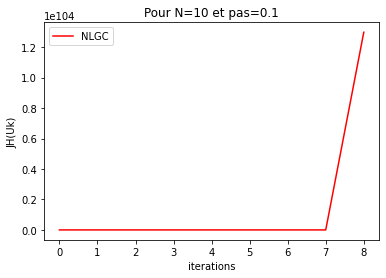

In [63]:
u=np.array([0,0])
eta=0.1
epsg=1.e-08
maxiter=1500
uNLGC,nbreiterNLGC,cost_NLGC=NLGC(JH,u,eta,epsg,maxiter)
print(nbreiterNLGC)
plt.plot(range(0,nbreiterNLGC+1), cost_NLGC[0:nbreiterNLGC+1], 'r-', label="NLGC")
plt.xlabel('iterations')
plt.ylabel('JH(Uk)')
plt.title('Pour N=10 et pas=0.1')
plt.legend()

>On remarque que NLGC ne converge pas vers le minimum de JH(v), car la fonction admet deux minimums, ce qui rend très compliqué à l'algorithme de converger vers un à cause du pas constant.